In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv
/kaggle/input/cs178-wine-quality/winequality-red.csv
/kaggle/input/cs178-wine-quality/winequality-white.csv
/kaggle/input/cs178-wine-quality/winequality.names


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random

In [3]:
#Pre-prossesing
df = pd.read_csv('/kaggle/input/cs178-wine-quality/winequality-white.csv')
df = df.dropna()
data = df.values

new_data = []
for i in data:
    [temp] = i 
    new_data.append(list(map(float,list(temp.split(";")))))
new_data = np.array(new_data)

X_train = new_data[:,:-1]
Y_train = new_data[:,-1]

In [4]:
#Training

X_trans = np.transpose(X_train) 

XtX = np.matmul(X_trans,X_train)
XtX_inverse = np.linalg.inv(XtX)
XtY = np.matmul(X_trans,Y_train)

Beta = np.matmul(XtX_inverse,XtY)
print(Beta)

[-5.05906229e-02 -1.95851023e+00 -2.93492412e-02  2.49883984e-02
 -9.42582369e-01  4.79078658e-03 -8.77630817e-04  2.04204607e+00
  1.68395142e-01  4.16453560e-01  3.65633380e-01]


In [5]:
#Testing
Y_cap = np.matmul(X_train,Beta)
Y_cap = np.round(Y_cap)

0.8081607042964702


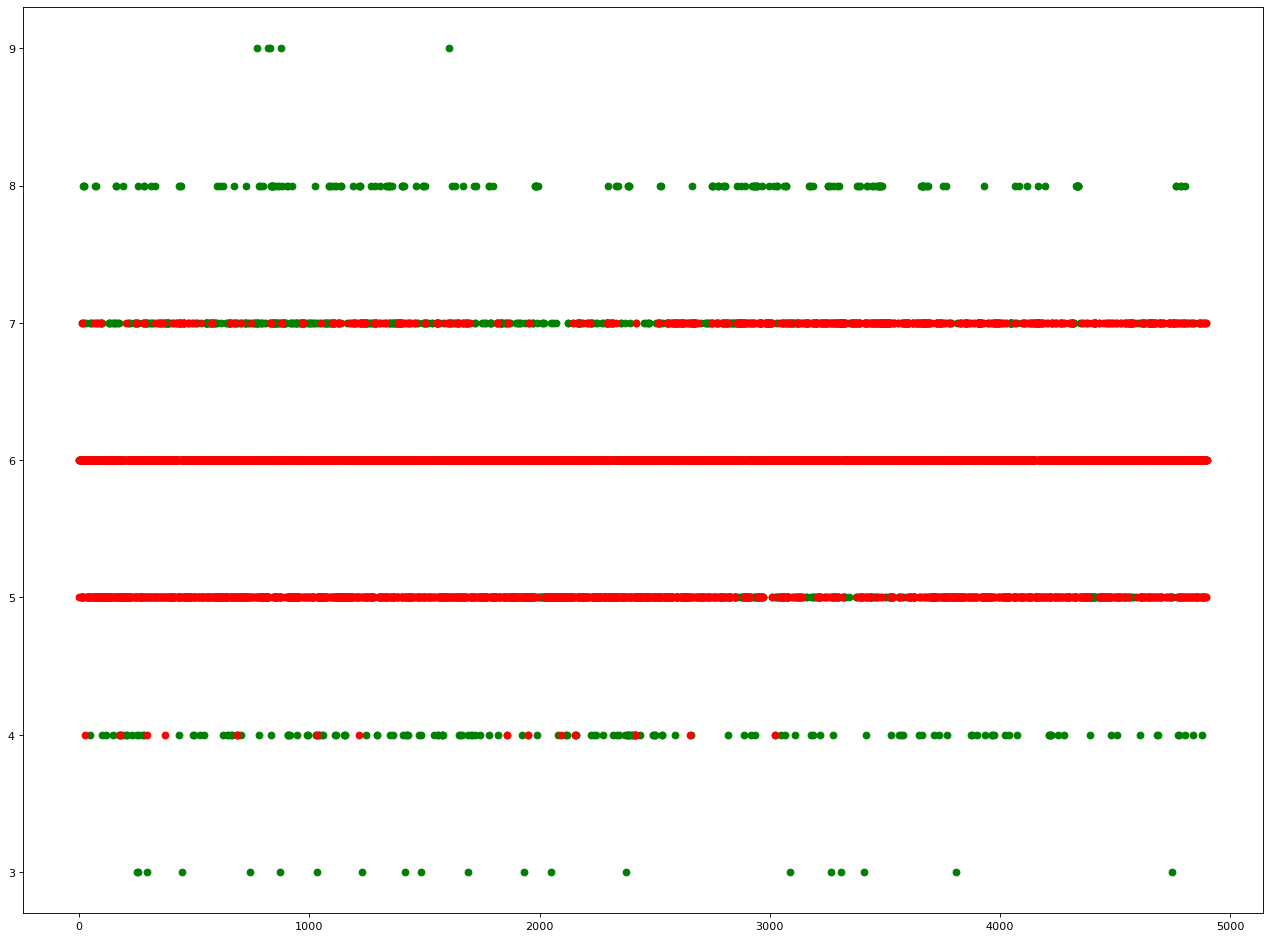

In [6]:
rmse = (((Y_cap - Y_train)**2).mean())**0.5
print(rmse)

plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Y_train,'go',Y_cap,'ro')

In [7]:
alpha = 0.0000001
beta = [random.random() for i in range(11) ]
beta = np.array(beta)
beta

array([0.38686424, 0.62148404, 0.15320201, 0.57318998, 0.95414995,
       0.49826632, 0.05664208, 0.81370519, 0.78074498, 0.77716127,
       0.66786663])

In [8]:

rmse1 = 1000
rmse2 = 1000
rmse3 = 1000

while True:
    Y_cap = np.matmul(X_train,beta)
    temp = Y_cap - Y_train
    temp_trans = np.transpose(temp)
    temp = np.matmul(temp_trans,X_train)

    beta = beta - alpha*temp/m
    #print("Beta",beta)
    rmse = (((Y_cap - Y_train)**2).mean())**0.5
    #print("RMSE =",rmse)
    rmse1 = rmse2
    rmse2 = rmse3
    rmse3 = rmse
    temp_mean = (rmse1 +rmse2 +rmse3 )/3
    if(abs(temp_mean - rmse) < 0.00001):
        break
print("Beta",beta)
print("RMSE =",rmse)

NameError: name 'm' is not defined

In [9]:
#Testing
Y_cap = np.matmul(X_train,beta)
Y_cap = np.round(Y_cap)

38.512964943805095


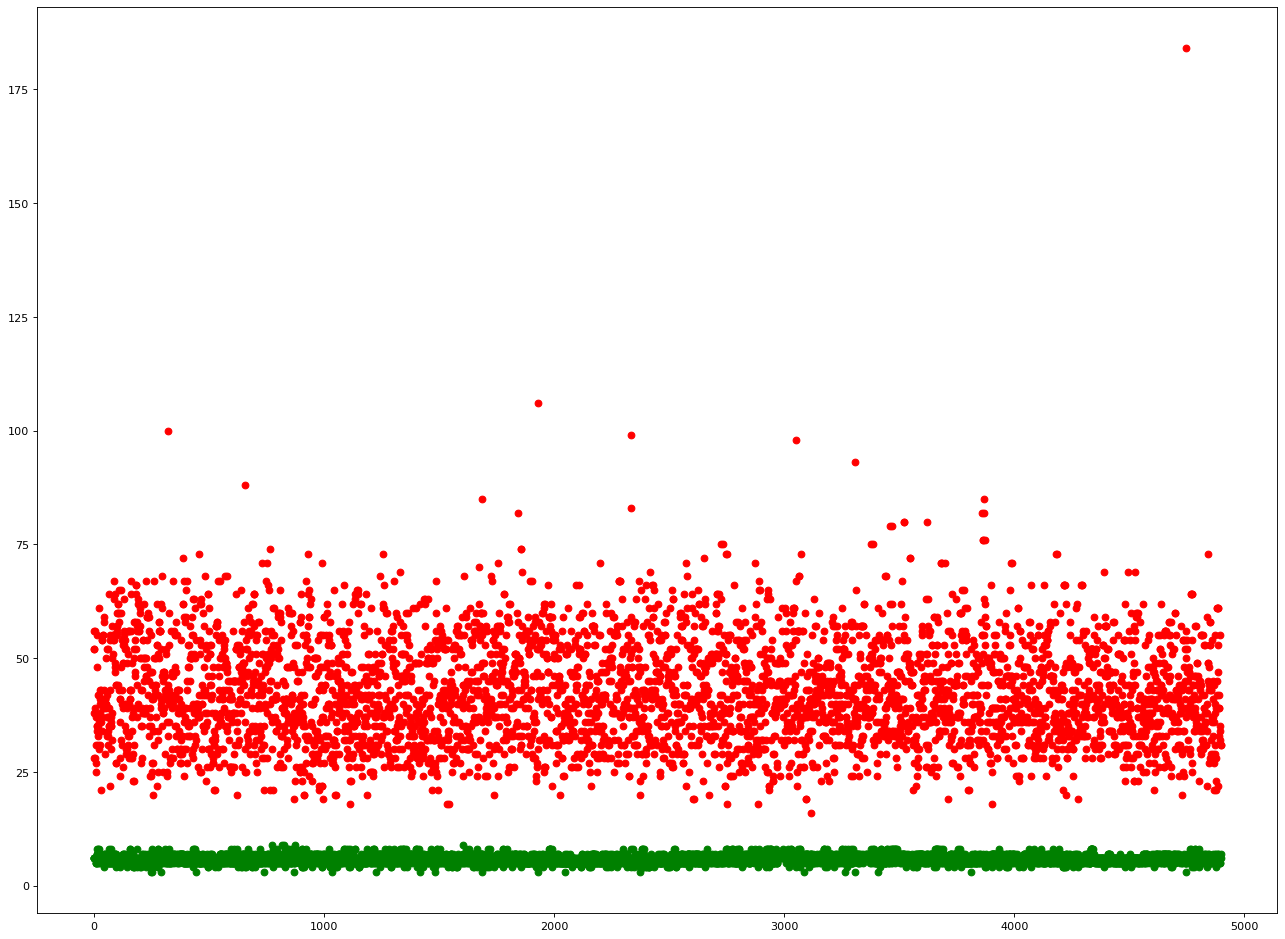

In [10]:
rmse = (((Y_cap - Y_train)**2).mean())**0.5
print(rmse)

plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Y_train,'go',Y_cap,'ro')